This evaluation file was created to be run on the google collab environment. This is why the file paths refer to content which is where we stored our separate agent files. To run the evaluation file succesfully make sure to import the correct versions of keras and tensorflow as shown below and also make sure to import the agent files from the correct directory.
It is to be noted that some of the agents take longer to train with the parameters set in the notebook


In [1]:
!git clone https://git.dcs.gla.ac.uk/SebastianStein/virl.git

Cloning into 'virl'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
!pip install q keras==2.2.4
!pip install tensorflow==1.14
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

     |████████████████████████████████| 317kB 5.4MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 109.2MB 48kB/s 
     |████████████████████████████████| 3.2MB 37.2MB/s 
     |████████████████████████████████| 491kB 33.6MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [3]:
%cd /content/virl/virl


/content/virl/virl


In [4]:
import gym

import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl
env = virl.Epidemic(stochastic=False, noisy=False)

In [5]:
%cd /content


/content


In [6]:
import run_deterministic as agent_d
%cd /content
import run_random as agent_r
%cd /content
import run_policysearch as agent_p
%cd /content
import run_rbf as agent_f
%cd /content
import run_qtable as agent_q

/content
/content
/content
/content


**Deterministic Agent**

total reward -1.6811867446144855


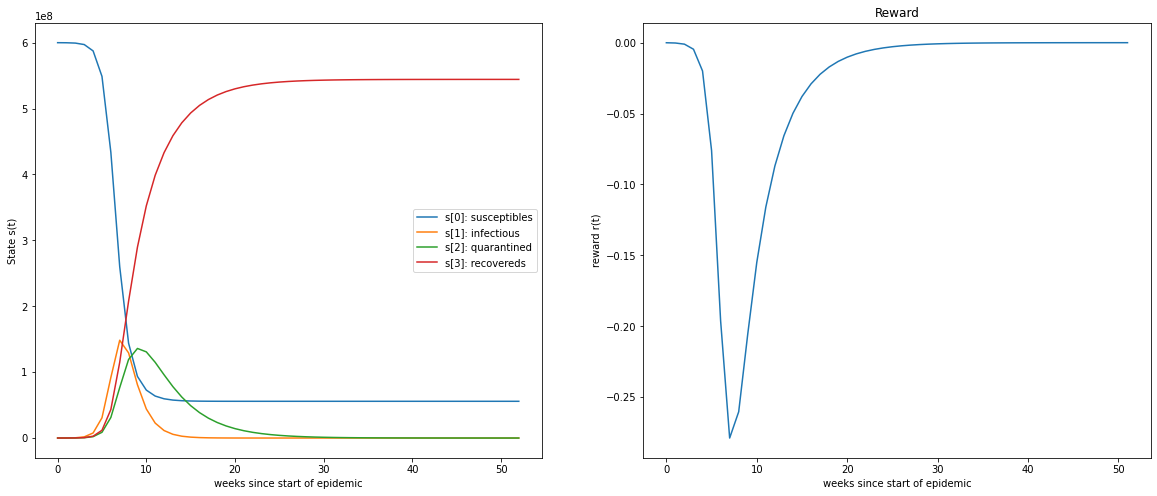

In [7]:
s,r = agent_d.deterministic_agent(0, env)
agent_d.graphs(s,r)

total reward -1.6336942500717837


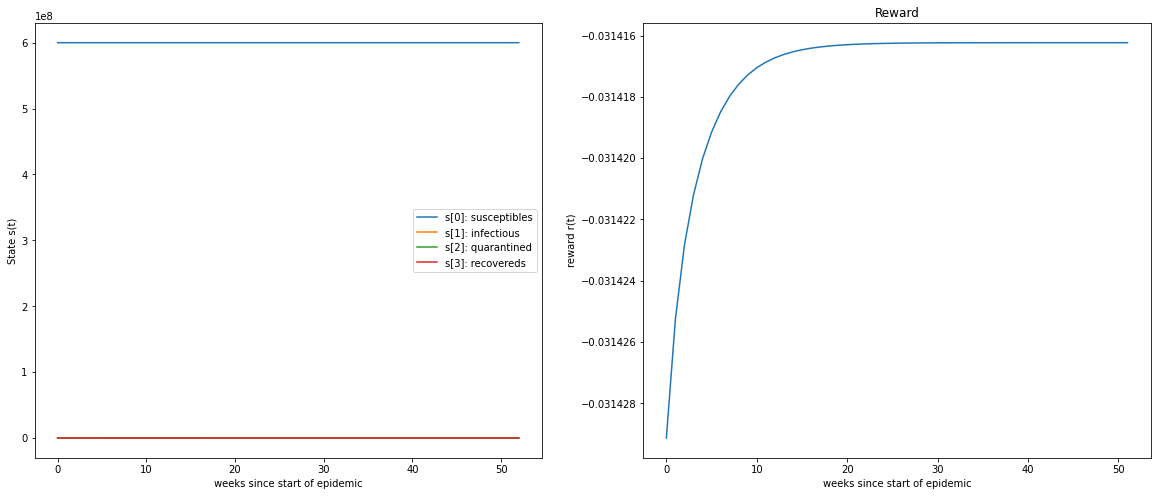

In [8]:
s,r = agent_d.deterministic_agent(1, env)
agent_d.graphs(s,r)

total reward -1.284974326755993


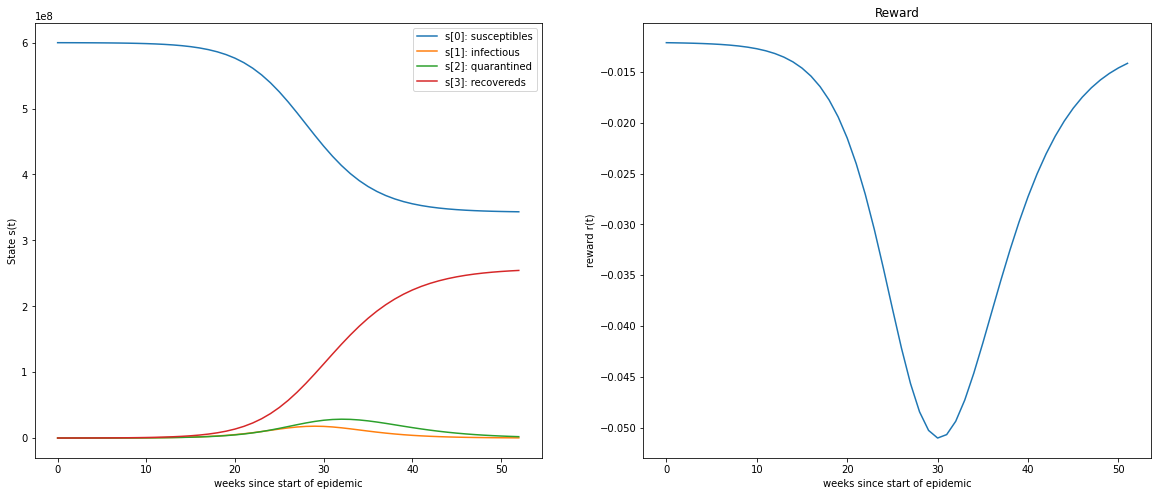

In [9]:
s,r = agent_d.deterministic_agent(2, env)
agent_d.graphs(s,r)

total reward -1.554262516767732


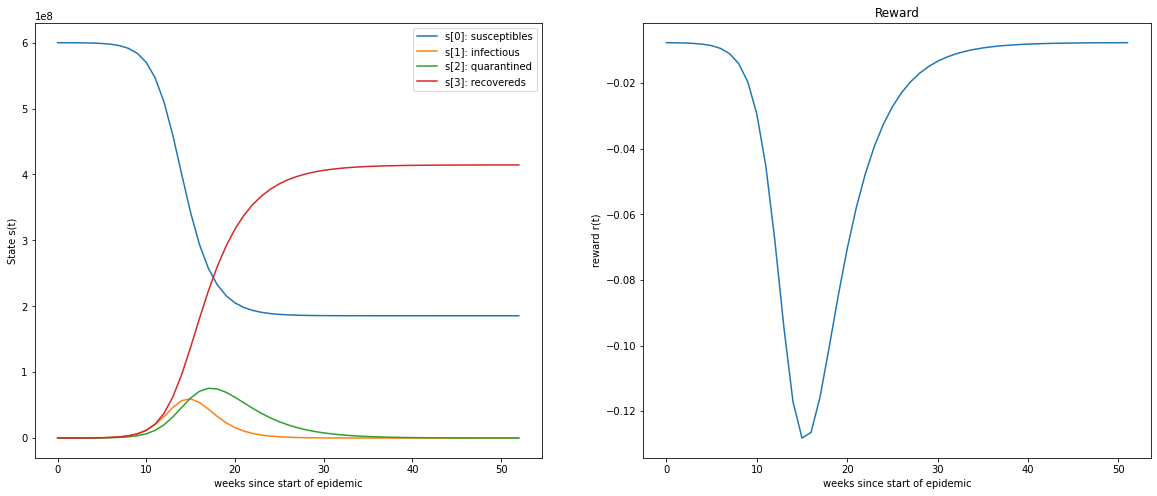

In [10]:
s,r = agent_d.deterministic_agent(3, env)
agent_d.graphs(s,r)

In [11]:
for action in range(4):
  print("Deterministic Agent Using Action " + str(action))
  print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
  print("___________________________________________________________________________________________________")
  for i in range(10):
    test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    s0,r0 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
    s1,r1 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
    s2,r2 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    s3,r3 = agent_d.deterministic_agent(action, test_env)
    print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
  print("\n")

Deterministic Agent Using Action 0
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.6811867446144855 | -1.9732822665237746 | -1.6811867446144855 | -1.6590425427480393 |
1          | -0.8332845032786539 | -1.9467785401454631 | -0.8332845032786539 | -1.5872977567333029 |
2          | -1.1755350586264501 | -1.8687017412293094 | -1.1755350586264501 | -1.5013824016080661 |
3          | -1.406400866340364 | -1.4295591318668437 | -1.406400866340364 | -1.9213614204885336 |
4          | -1.5668924670149622 | -1.2672837939484645 | -1.5668924670149622 | -0.9992597258735019 |
5          | -1.781515463688663 | -1.6408177864501128 | -1.781515463688663 | -1.6631626896938283 |
6          | -1.8389731412055614 | -1.9707180015030252 | -1.8389731412055614 | -1.9611355288642394 |
7          | -1.8825637108287268 | -1.988157028240257 | -1.882

**__Random Agent__**

total reward -1.5913958007466042


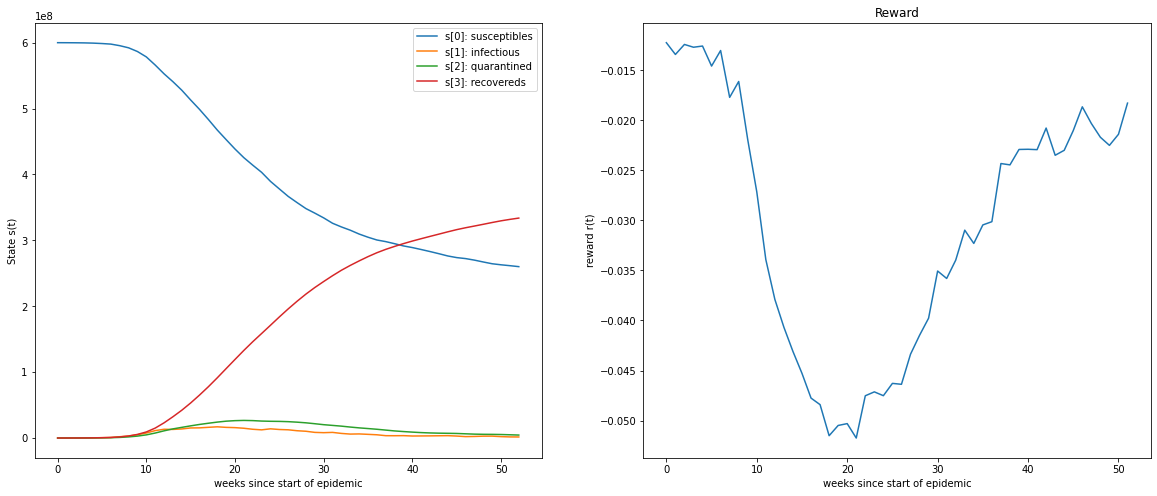

In [12]:
test_env = virl.Epidemic(stochastic=False, noisy=False,)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.8474257773917249


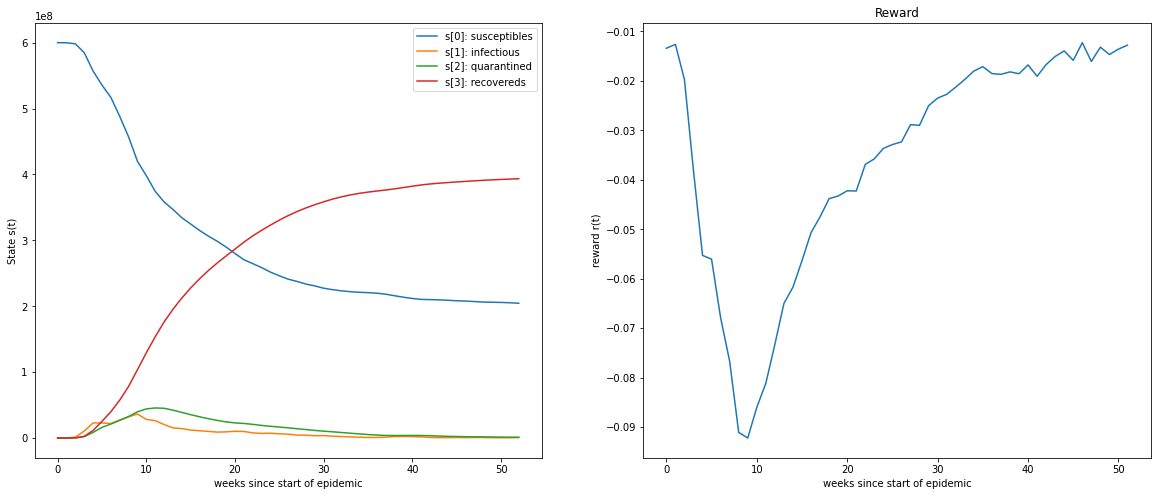

In [13]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.5947344600115476


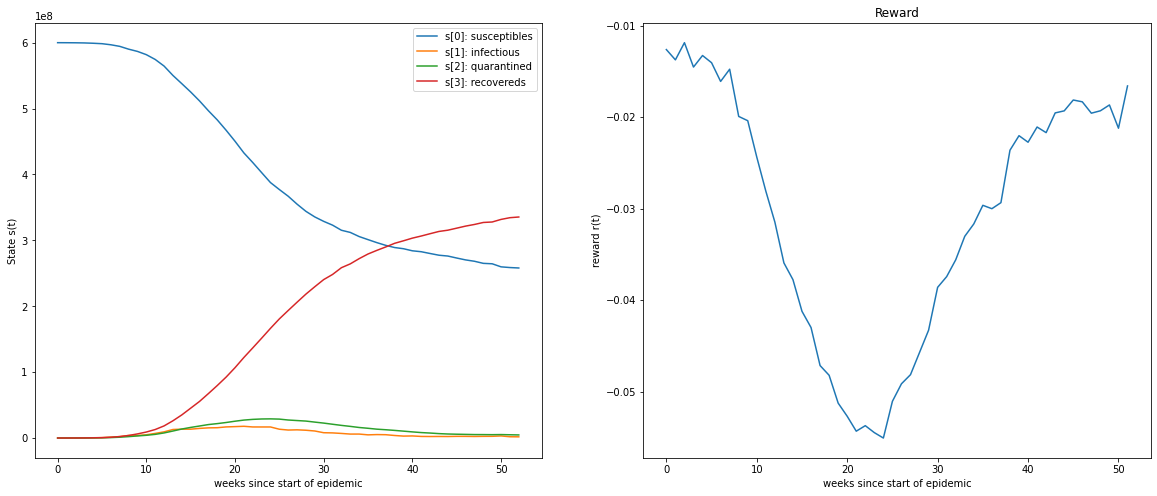

In [14]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.832545935870061


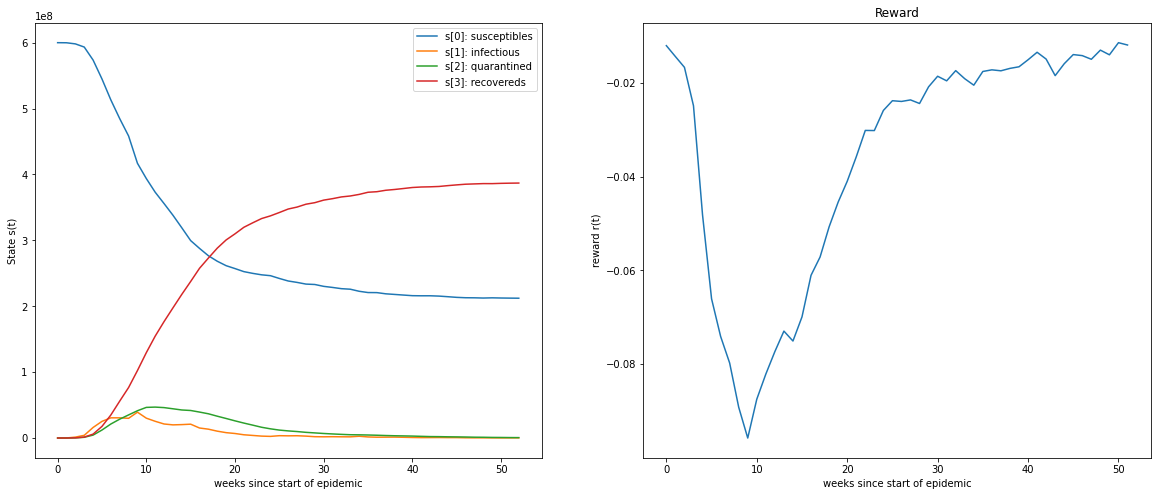

In [15]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

In [16]:
print("Random Agent Using 100 Runs")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s2,r2 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s3,r3 = agent_r.random_agent(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")


Random Agent Using 100 Runs
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.6690841998907633 | -1.947312280145452 | -1.6216663125895572 | -1.9224594761199443 |
1          | -0.6729800826471785 | -1.8460465647253628 | -0.671647294098989 | -1.841017127415164 |
2          | -0.6851062999056844 | -1.7842178127112829 | -0.6742988544171125 | -1.9224731997828244 |
3          | -0.8249531251558226 | -1.8607522139467398 | -0.8240310440890973 | -1.8059833175306321 |
4          | -1.2868907921873756 | -1.9449564712931993 | -1.3102858082449527 | -1.889496869743755 |
5          | -1.9160049568254698 | -1.792935166773643 | -1.8816976302704371 | -1.8114128298577645 |
6          | -2.0254874443250537 | -1.8428258569419724 | -2.015892122446436 | -1.8623214297625046 |
7          | -2.1580224971160678 | -1.9423918597719663 | -2.11513243709

**Policy Search**

In [17]:
def avg_random_p(iterations, env):
  cumulative_s = []
  cumulative_r = []
  total_s=np.zeros(53*4)
  total_s.shape = (53,4)

  total_r=np.zeros(52)
  total_r.shape = (52)

  for i in range(iterations):
    s,r = agent_p.runpolicy(test_env)
    cumulative_s.append(s)
    cumulative_r.append(r)

  for i in range(iterations):
    total_s = np.add(total_s,cumulative_s[i])
    total_r = np.add(total_r,cumulative_r[i])
 
  res_s = np.array(total_s)/iterations
  res_r = np.array(total_r)/iterations
  return res_s,res_r

Step 51 @ Episode 1000/1000 (-1.4594913311019195)

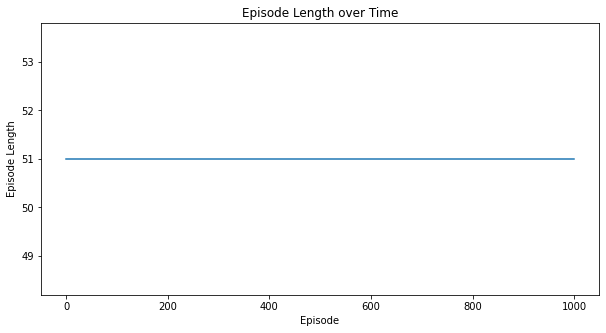

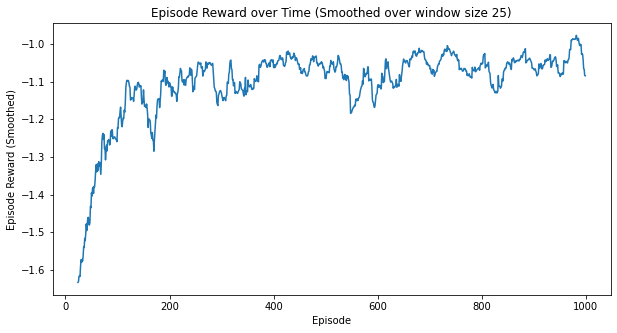

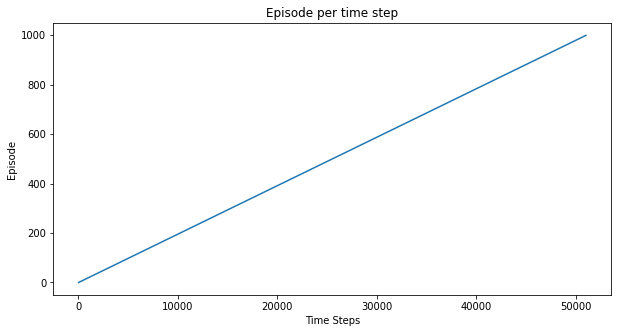

total reward -1.0993420618809715


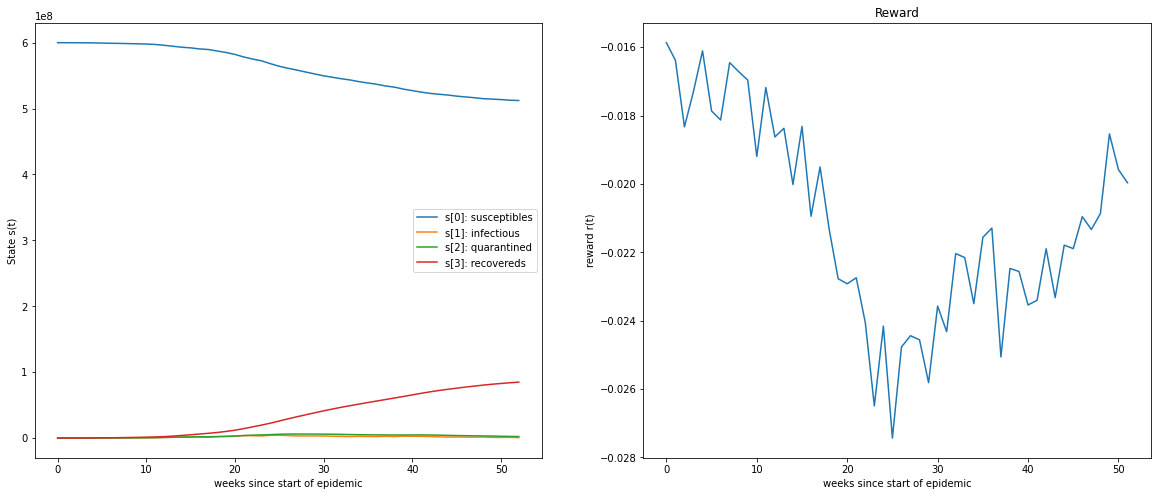

In [24]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_p.policy_execute(env, alpha = 0.001, discount_factor=0.99, episodes_number = 1000, list_of_vals = [3,3,3,3])
test_env = virl.Epidemic(stochastic=False, noisy=False)
#s,r = agent_p.runpolicy(test_env)
#s,r = avg_random(100,agent_p.runpolicy(test_env))
#agent_p.graphs(s,r)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

Step 51 @ Episode 1000/1000 (-1.0313176409410085)

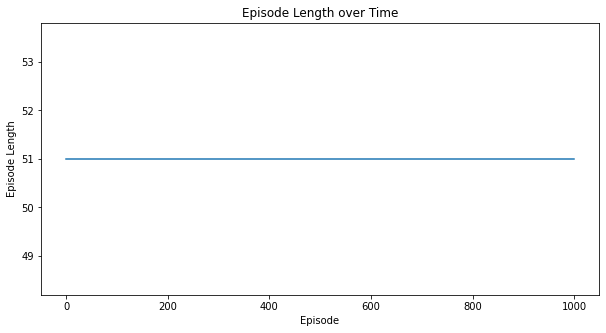

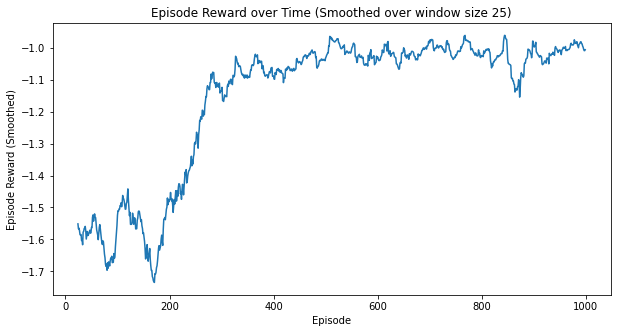

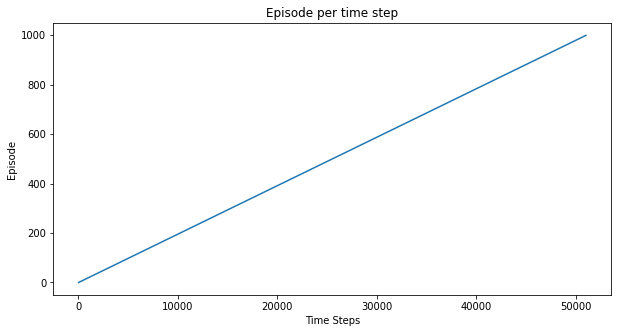

total reward -0.9945454221220661


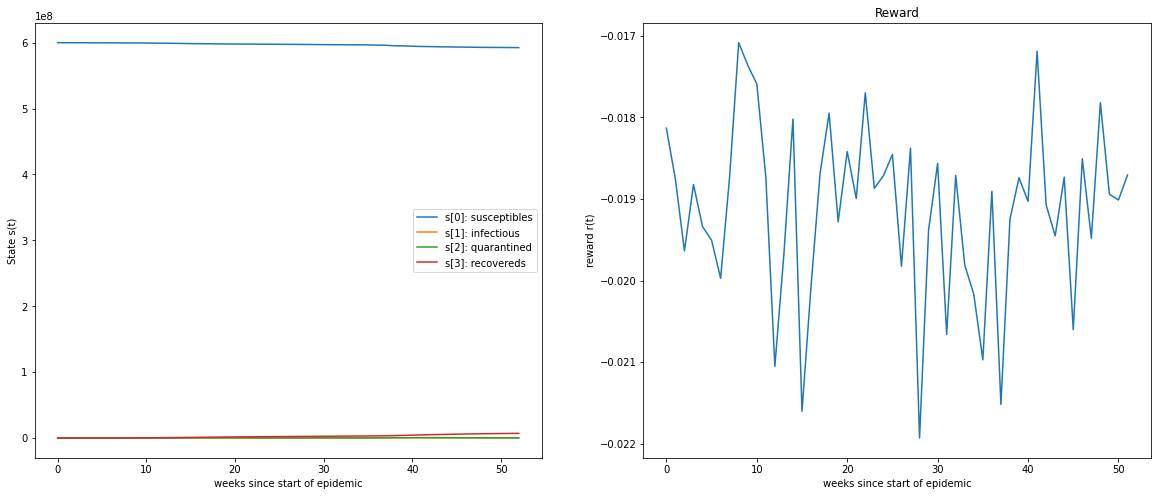

In [19]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_p.policy_execute(env, alpha = 0.001, discount_factor=0.99, episodes_number = 1000, list_of_vals = [6,50,50,6])
test_env = virl.Epidemic(stochastic=False, noisy=False)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -1.707701767366399


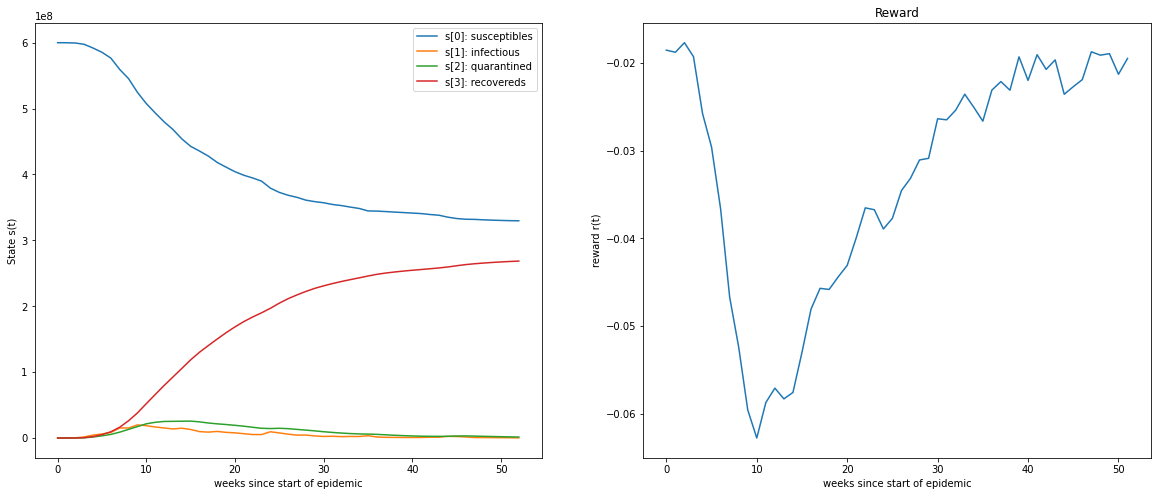

In [20]:

test_env = virl.Epidemic(stochastic=True, noisy=False)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -1.1164032749729573


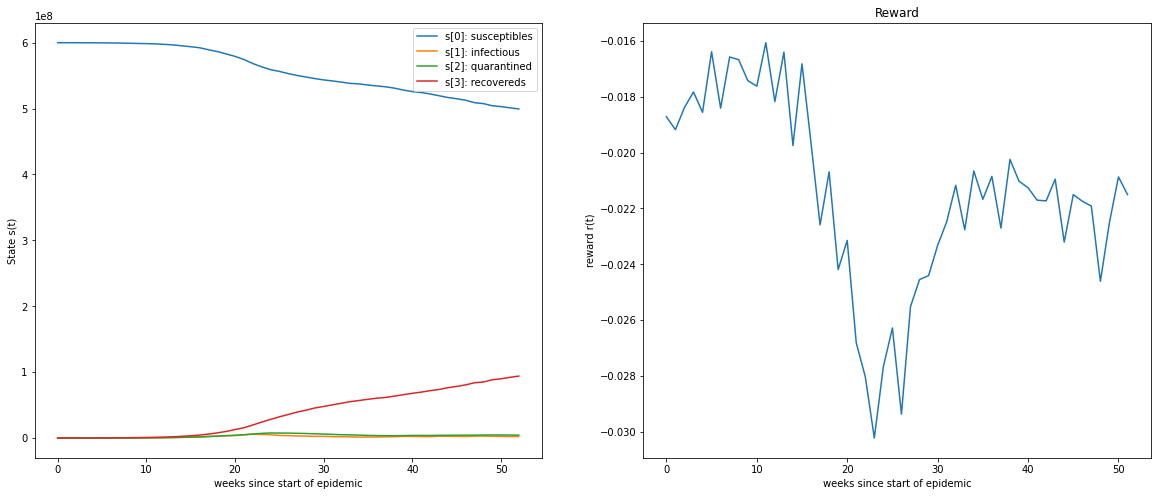

In [26]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -1.7540476119525779


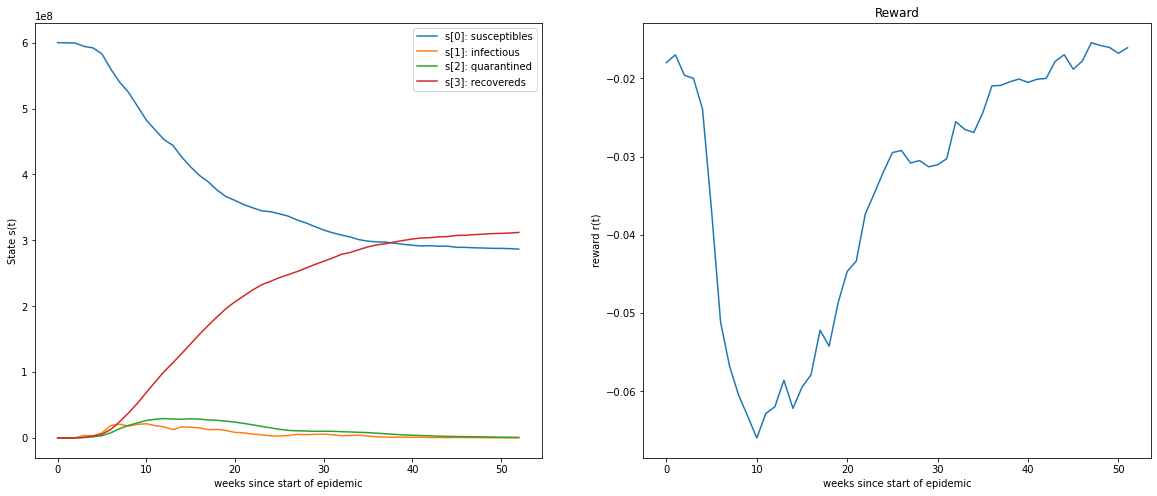

In [25]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

In [27]:
print("Policy Search Using 100 Runs")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  res,r2 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  res,r3 = avg_random_p(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")

Policy Search Using 100 Runs
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.0717056153921383 | -1.8901155234719236 | -1.129315466405994 | -1.8305474222155607 |
1          | -0.877058466611723 | -1.8030866537955317 | -0.8884586894627107 | -1.790061623918011 |
2          | -0.9021253357499046 | -1.6882853121945884 | -0.8981028294331312 | -1.8208712698603067 |
3          | -0.8956544660251962 | -1.817471537255546 | -0.87562677987947 | -1.729785630267811 |
4          | -0.9207270209578811 | -1.8368111979605053 | -0.9200376544252619 | -1.765973166143249 |
5          | -1.5291589312297509 | -1.789470778116749 | -1.4974994739777547 | -1.8709079471992867 |
6          | -1.7934469159425546 | -1.6945584579724964 | -1.7841474129061436 | -1.7288712475346826 |
7          | -2.00525629687613 | -1.7731386789671277 | -2.027399521570705

**Q-Table**

total reward -1.284974326755993


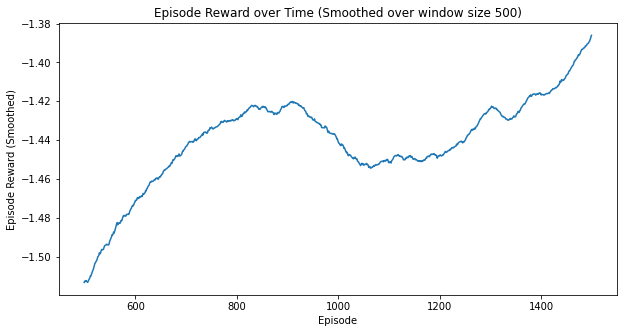

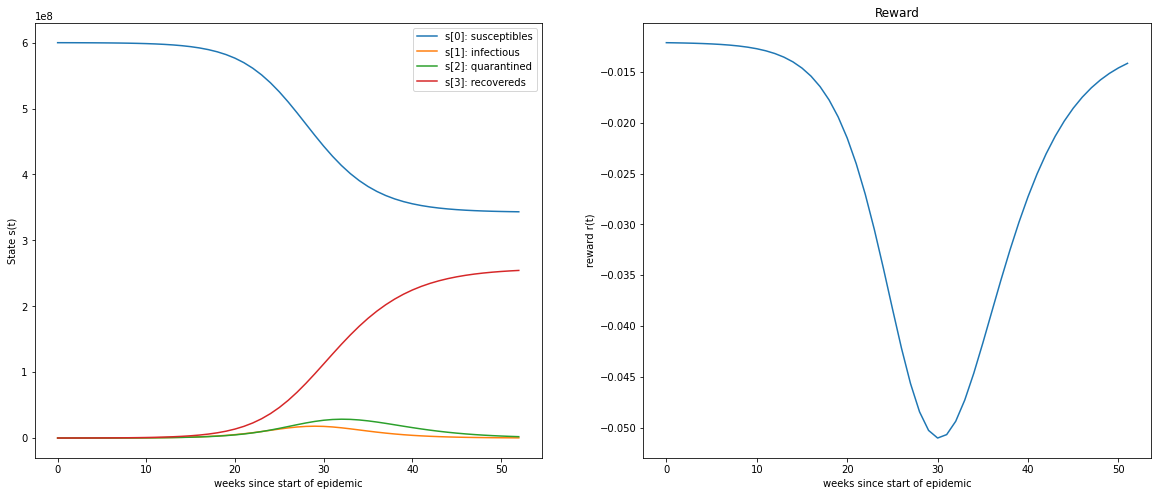

In [28]:
q_table = agent_q.qtable(env,num_episodes=1500,list_of_vals=[3,3,3,3])
test_env = virl.Epidemic(stochastic=False, noisy=False)

s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.4316792034837167


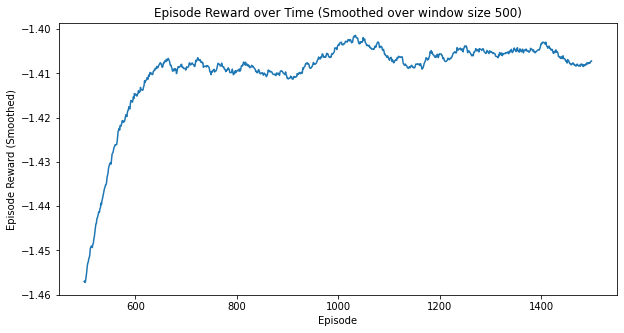

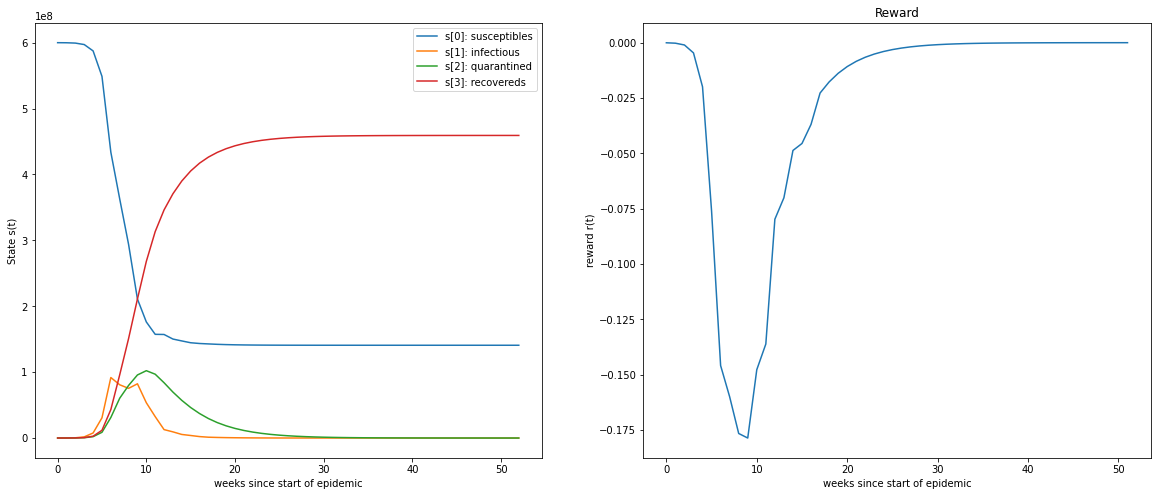

In [29]:
q_table = agent_q.qtable(env,num_episodes=1500,list_of_vals=[6,50,50,6])
test_env = virl.Epidemic(stochastic=False, noisy=False)

s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.5785167992067775


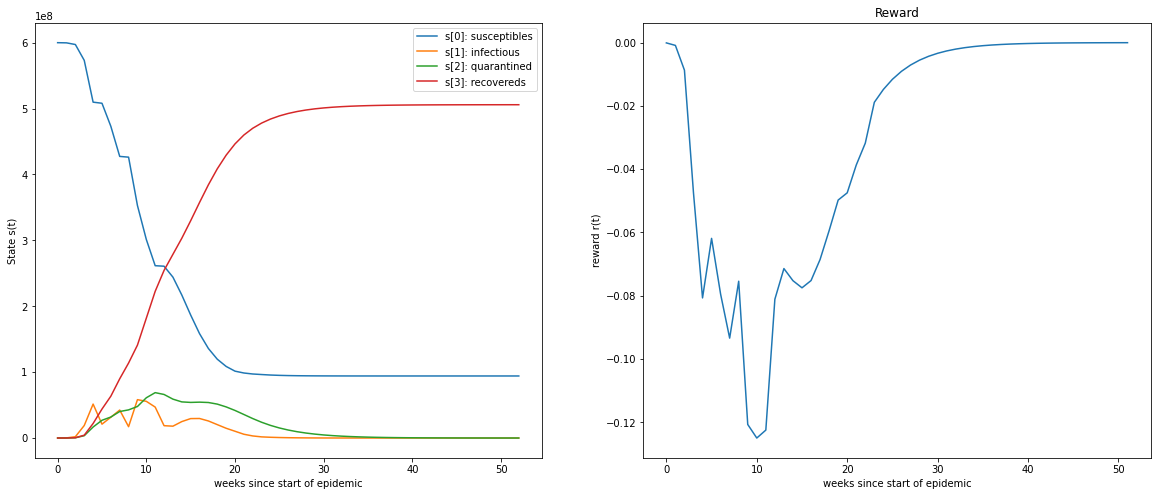

In [30]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.3110145982798116


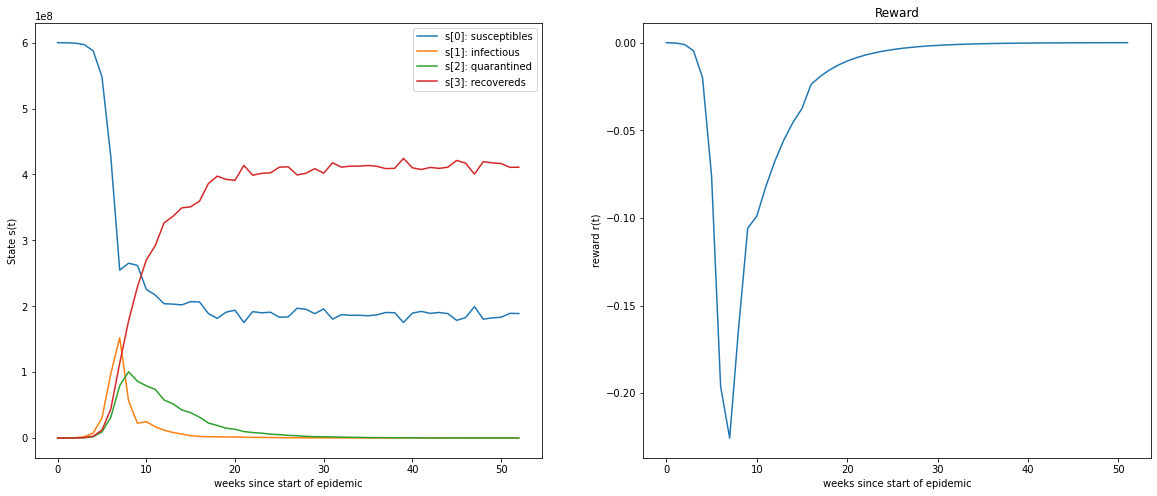

In [31]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -2.0793994643474254


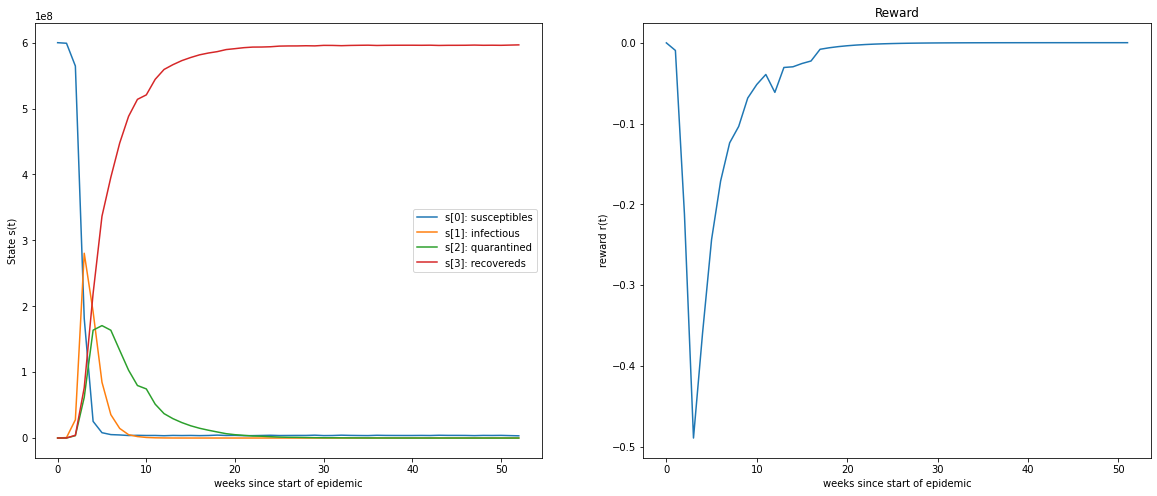

In [32]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

In [33]:
print("Q-Table")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s,r0 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s,r1 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s,r2 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s,r3 = agent_q.run(q_table, test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")


Q-Table
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.4316792034837165 | -2.087759037092993 | -1.471917957934418 | -0.7458769692393675 |
1          | -1.0798025011406611 | -1.9543615953622462 | -1.0798025011406611 | -1.482792783403706 |
2          | -0.7895476551232197 | -1.7071874311067774 | -0.784118074301898 | -2.0228121988017036 |
3          | -1.042446074721974 | -2.071074039156745 | -1.150362953118483 | -2.128376783135056 |
4          | -1.4147913934713667 | -2.0970367154901526 | -1.561585185199597 | -2.071972661692493 |
5          | -1.905550364368284 | -0.7634926718410211 | -1.9012117763723344 | -1.9795213965573115 |
6          | -1.927717209734921 | -0.7555584011146024 | -1.9708080537950163 | -2.058697904967351 |
7          | -1.9558101335264517 | -1.4676158898677645 | -1.9491726058911276 | -1.1289975110045205

**Q-Learning with RBF Function Approximation**

In [34]:
def avg_random_rbf(iterations, env):
  cumulative_s = []
  cumulative_r = []
  total_s=np.zeros(53*4)
  total_s.shape = (53,4)

  total_r=np.zeros(52)
  total_r.shape = (52)

  for i in range(iterations):
    s,r = agent_f.run_rbfpolicy(env)
    cumulative_s.append(s)
    cumulative_r.append(r)

  for i in range(iterations):
    total_s = np.add(total_s,cumulative_s[i])
    total_r = np.add(total_r,cumulative_r[i])
 
  res_s = np.array(total_s)/iterations
  res_r = np.array(total_r)/iterations
  return res_s,res_r

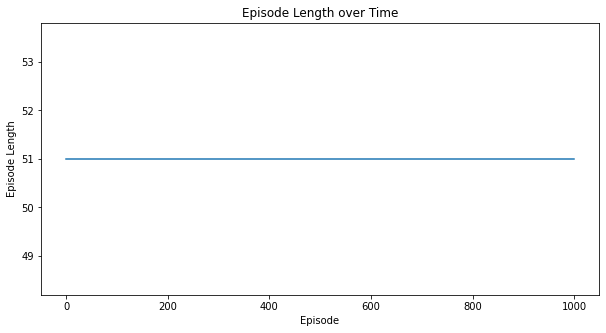

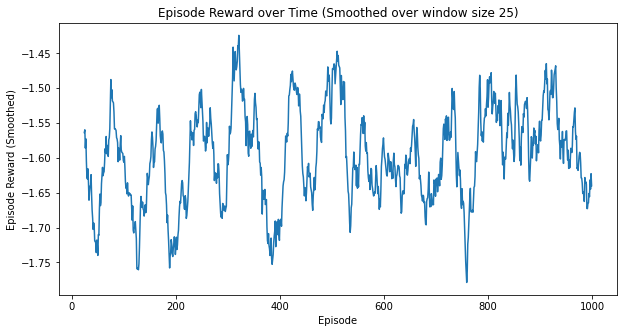

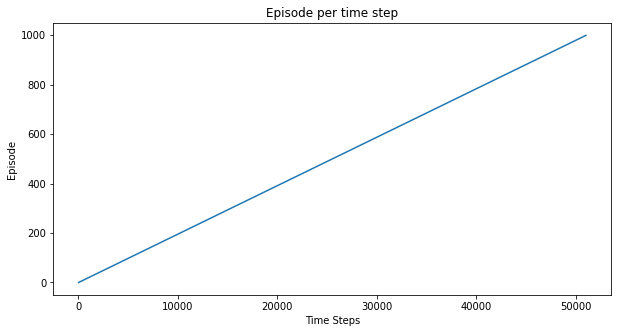

Step 51

([array([5.9996e+08, 2.0000e+04, 0.0000e+00, 2.0000e+04]),
  array([5.99931693e+08, 2.66299680e+04, 9.65359647e+03, 3.20233987e+04]),
  array([5.99782321e+08, 1.18800244e+05, 3.35937705e+04, 6.52848284e+04]),
  array([5.99116846e+08, 5.29261893e+05, 1.42426598e+05, 2.11465497e+05]),
  array([5.99101816e+08, 2.14974920e+05, 2.53718012e+05, 4.29491467e+05]),
  array([5.97901884e+08, 9.54361939e+05, 4.07181268e+05, 7.36573028e+05]),
  array([5.92631750e+08, 4.19088154e+06, 1.24374143e+06, 1.93362668e+06]),
  array([5.83582911e+08, 7.80258409e+06, 3.40444501e+06, 5.21005943e+06]),
  array([5.83367211e+08, 3.16565602e+06, 4.75300187e+06, 8.71413086e+06]),
  array([5.67168404e+08, 1.28970820e+07, 6.63776343e+06, 1.32967503e+07]),
  array([5.09366505e+08, 4.60287533e+07, 1.63626038e+07, 2.82421382e+07]),
  array([3.71554672e+08, 1.11545499e+08, 4.52988062e+07, 7.16010233e+07]),
  array([2.15058556e+08, 1.42929082e+08, 9.08574389e+07, 1.51154923e+08]),
  array([1.71329893e+08, 8.23943250e+07, 

In [35]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_f.rbf_execute(env, num_episodes = 1000, learning_rate="optimal",eta0=0.005,epsilon=1,epsilon_decay=0.9999)
test_env = virl.Epidemic(stochastic=False, noisy=False)
# agent_f.run_rbfpolicy(test_env)

Step 51total reward -1.9857025437433906


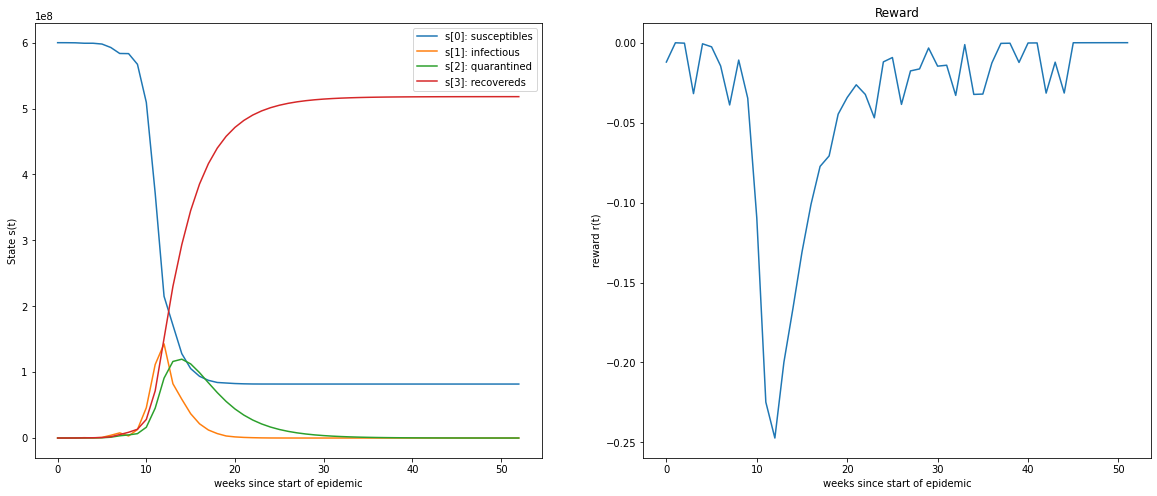

In [36]:
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Q-Learning with RBF Function Approximation
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
Step 510          | -1.98570254374339 | -1.8418165378847369 | -1.8222602758384325 | -1.9814661963507936 |
Step 511          | -0.37570285271787013 | -1.9282202697839803 | -0.43531888112780515 | -1.9493324205307623 |
Step 512          | -1.1327566656629022 | -1.9013933160609724 | -1.022265035058244 | -1.9753231924954964 |
Step 513          | -1.4738425561061403 | -1.9204907962274709 | -1.4223124629100667 | -1.9178569398078074 |
Step 514          | -1.6017356533938203 | -2.028429175397406 | -1.6386893081952418 | -1.909710348699459 |
Step 515          | -1.9808441696993568 | -1.9820258958935955 | -1.950859708009152 | -1.9616963487200976 |
Step 516          | -2.228036999384441 | -1.8837217442658132 | -2.071851650330754 | -1.9992694997563742 |
Step 51

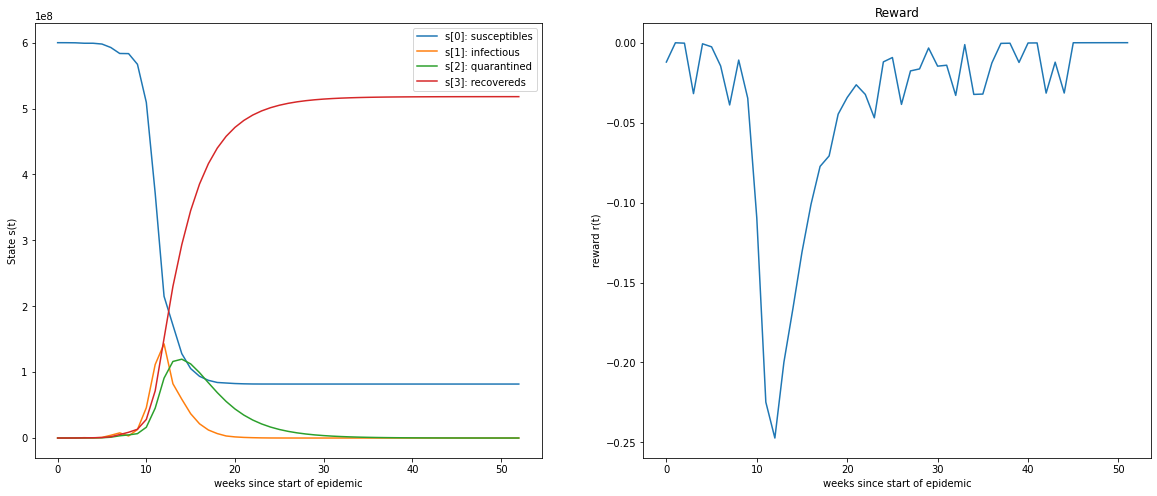

In [37]:
print("Q-Learning with RBF Function Approximation")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  res,r2 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  res,r3 = avg_random_rbf(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")





Step 51total reward -1.9857025437433906


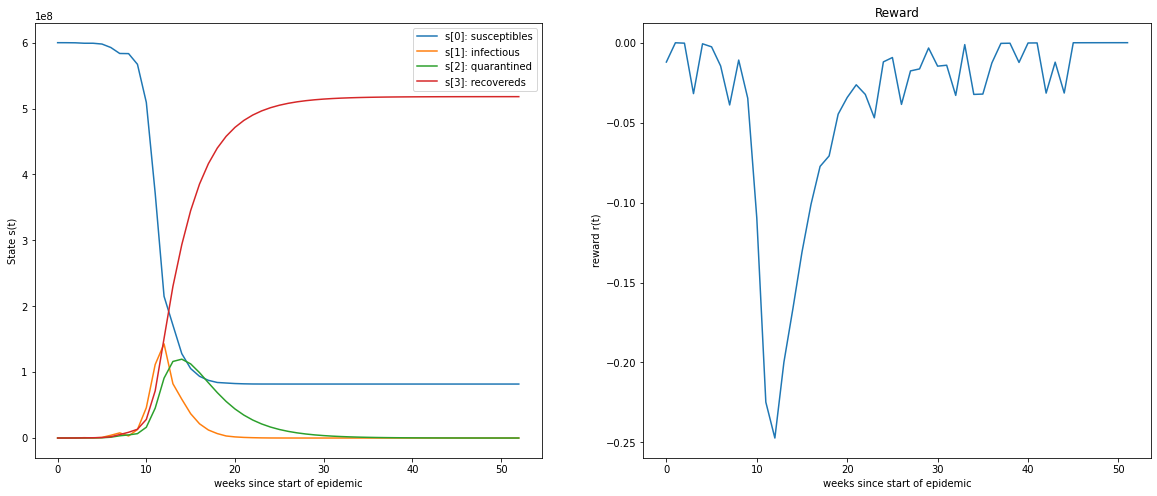

In [38]:
test_env = virl.Epidemic(stochastic=False, noisy=False)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.9000748972783073


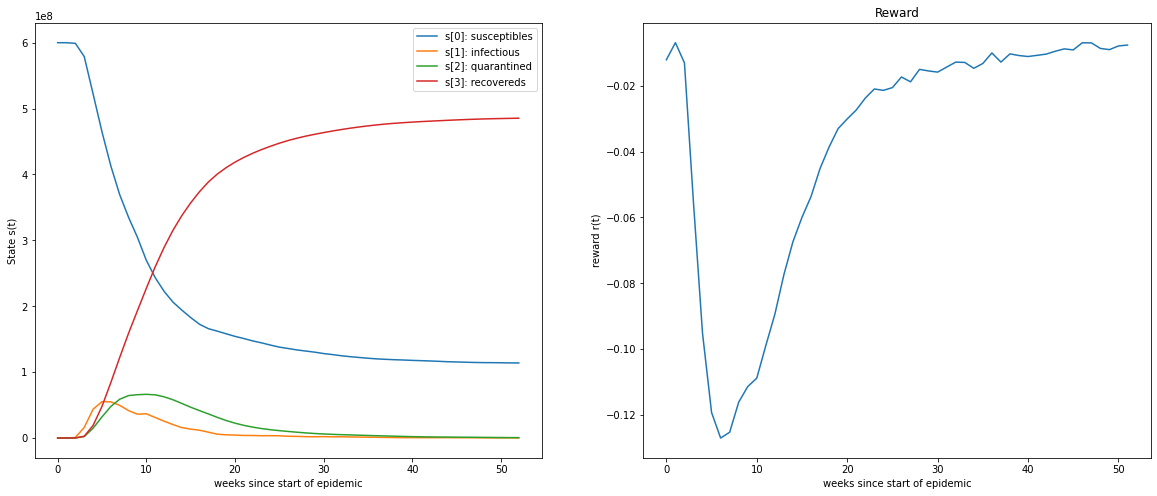

In [39]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.8292578672309039


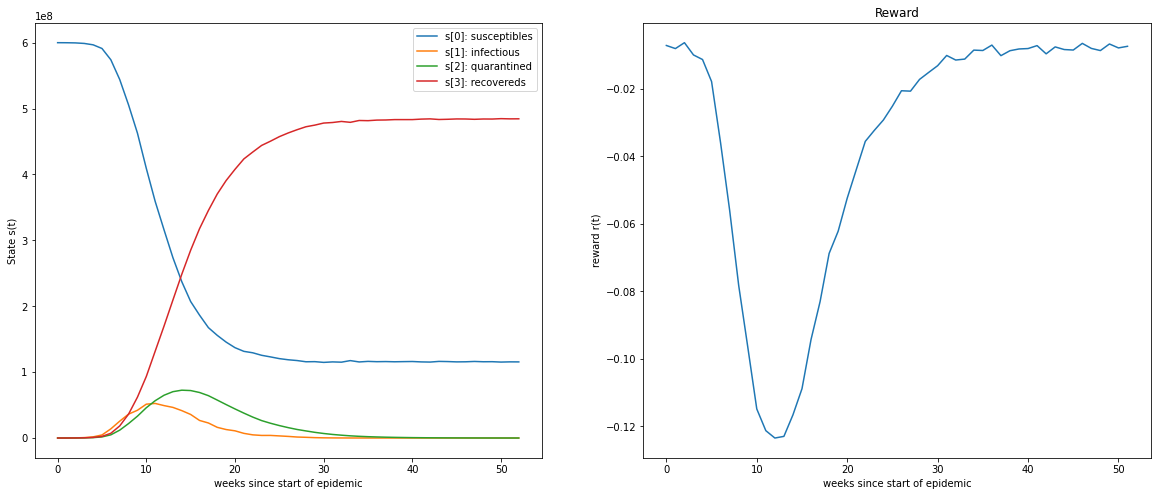

In [40]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.9398092378770722


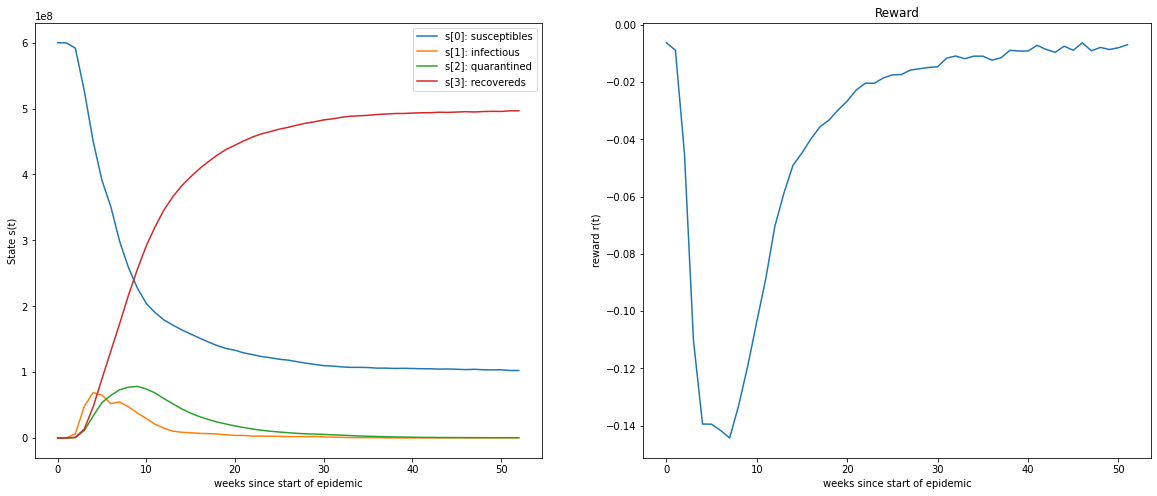

In [41]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
res,rer = avg_random_rbf(100,test_env) 
agent_f.graphs(res,rer)

In [ ]:
rewardsff=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardsff.append(sum(r))
print(rewardsff)

rewardstf=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardstf.append(sum(r))
print(rewardstf)

rewardsft=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardsft.append(sum(r))
print(rewardsft)

rewardstt=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardstt.append(sum(r))
print(rewardstt)
